In [1]:
import scipy.io

In [2]:
!pip install mat73
import mat73
data_dict = mat73.loadmat('/content/drive/MyDrive/semillero/nyu_depth_v2_labeled copy.mat')

ERROR:root:ERROR: MATLAB type not supported: containers.Map, (uint32)


In [3]:
data_dict.keys()

dict_keys(['accelData', 'depths', 'images', 'instances', 'labels', 'names', 'namesToIds', 'rawDepthFilenames', 'rawDepths', 'rawRgbFilenames', 'sceneTypes', 'scenes'])

In [4]:
image=data_dict['images']
image.shape

(480, 640, 3, 1449)

In [9]:
depths=data_dict['depths']
depths.shape

(480, 640, 1449)

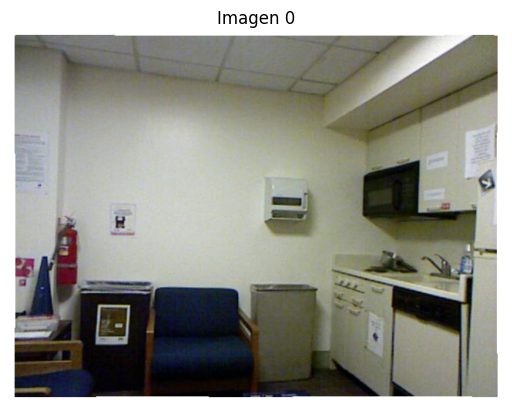

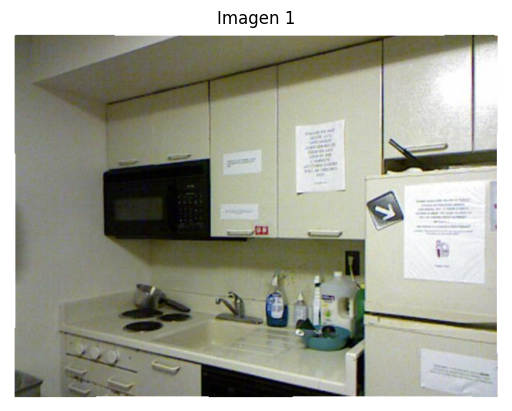

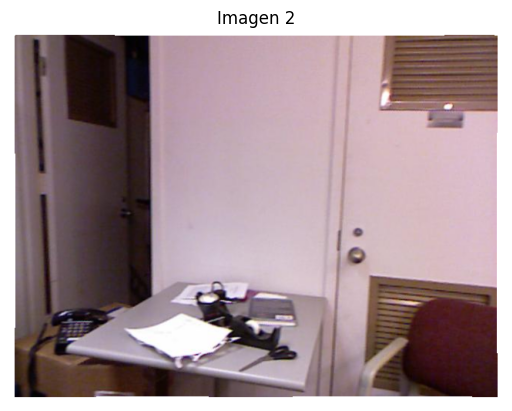

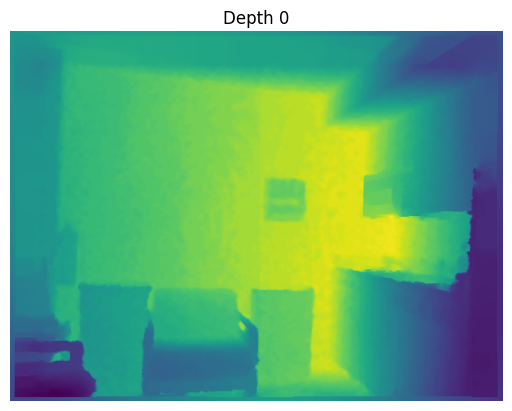

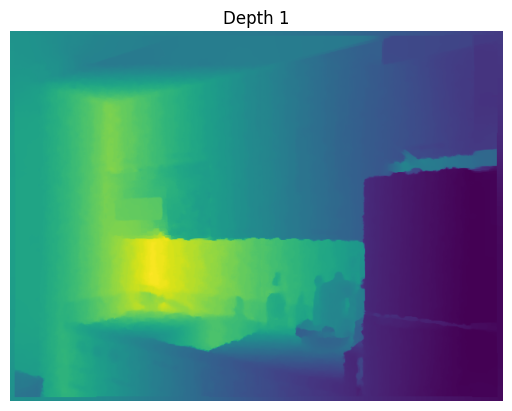

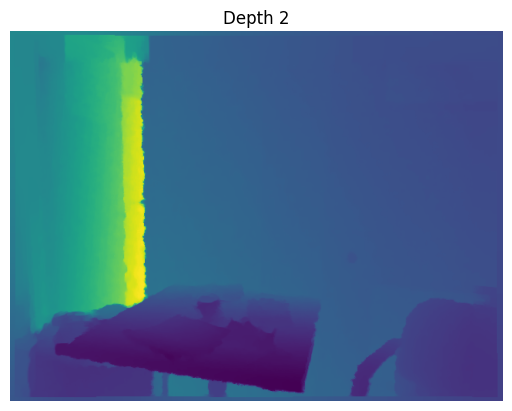

In [10]:
import matplotlib.pyplot as plt

for i in range(3):
    img = image[:, :, :, i]
    plt.imshow(img)
    plt.title(f"Imagen {i}")
    plt.axis('off')
    plt.show()

for i in range(3):
    dep = depths[:, :, i]
    plt.imshow(dep)
    plt.title(f"Depth {i}")
    plt.axis('off')
    plt.show()

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Crea un archivo ZIP con imágenes y profundidades
with zipfile.ZipFile("Dataset_Simulado.zip", "w") as zipf:
    for i in range(1449):  # Cambia a más si quieres más pares

        # Imagen RGB
        img = image[:, :, :, i]
        img_filename = f"img_{i}.png"
        plt.imsave(img_filename, img)
        zipf.write(img_filename)

        # Mapa de profundidad normalizado (escala de grises)
        depth_map = data_dict["depths"][:, :, i]
        depth_map = depth_map / np.max(depth_map)  # normalizar
        depth_filename = f"depth_{i}.png"
        plt.imsave(depth_filename, depth_map, cmap='gray')  # escala de grises
        zipf.write(depth_filename)

# Descargar el ZIP
files.download("Dataset_Simulado.zip")


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from google.colab import files

# Escenas completas como 'kitchen_0004'
scene_names = [x[0] for x in data_dict["scenes"]]


os.makedirs("sorted_images", exist_ok=True)

for i in range(1449):
    scene = scene_names[i]
    scene_folder = f"sorted_images/{scene}"
    os.makedirs(scene_folder, exist_ok=True)

    img = image[:, :, :, i]  # img shape: (480, 640, 3)

    if np.max(img) > 1:
        img = img / 255.0  # Normaliza si viene en 0–255

    plt.imsave(f"{scene_folder}/img_{i}.png", img)

# Comprimir a ZIP
with zipfile.ZipFile("imagenes_clasificadas.zip", "w") as zipf:
    for root, dirs, files_in_dir in os.walk("sorted_images"):
        for file in files_in_dir:
            zipf.write(os.path.join(root, file))

# Descargar
files.download("imagenes_clasificadas.zip")

